In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from keras import models
from keras import layers

from keras import optimizers, losses, metrics
from keras.layers.normalization import BatchNormalization


import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255
train_labels = to_categorical(train_Y)
test_labels = to_categorical(test_Y)
val_X = train_X[:4500]
train_X = train_X[4500:]
val_labels = train_labels[:4500]
train_labels = train_labels[4500:]

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)         

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_labels, epochs=40, batch_size=64, validation_data=(val_X, val_labels))
test_loss, test_acc = model.evaluate(test_X, test_labels)

Train on 45500 samples, validate on 4500 samples
Epoch 1/40
45500/45500 [==============================] - 9s 187us/step - loss: 1.3270 - accuracy: 0.5318 - val_loss: 1.4763 - val_accuracy: 0.4878
Epoch 2/40
45500/45500 [==============================] - 8s 178us/step - loss: 0.9638 - accuracy: 0.6648 - val_loss: 1.1775 - val_accuracy: 0.6013
Epoch 3/40
45500/45500 [==============================] - 8s 180us/step - loss: 0.8266 - accuracy: 0.7139 - val_loss: 1.6974 - val_accuracy: 0.4849
Epoch 4/40
45500/45500 [==============================] - 8s 184us/step - loss: 0.7293 - accuracy: 0.7491 - val_loss: 1.1014 - val_accuracy: 0.6342
Epoch 5/40
45500/45500 [==============================] - 8s 181us/step - loss: 0.6581 - accuracy: 0.7722 - val_loss: 0.9916 - val_accuracy: 0.6644
Epoch 6/40
45500/45500 [==============================] - 8s 183us/step - loss: 0.5994 - accuracy: 0.7926 - val_loss: 1.1144 - val_accuracy: 0.6364
Epoch 7/40
45500/45500 [==============================] - 8s 18

In [0]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

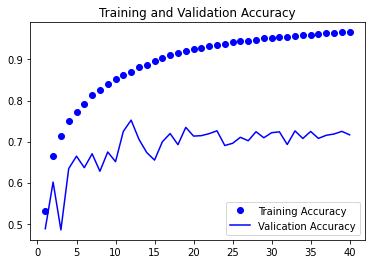

In [0]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

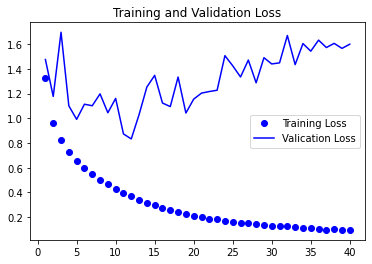

In [0]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [0]:
loss, accuracy = model.evaluate(test_X, test_labels)

10000/10000 [==============================] - 1s 123us/step


In [0]:
loss

1.7040965160369872

In [0]:
def inception_module(layer_in):
    
    branch_a = layers.Conv2D(128, 1, activation='relu', strides=2)(layer_in)
    
    branch_b = layers.Conv2D(128, 1, activation='relu')(layer_in)
    branch_b = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(branch_b)
    
    branch_c = layers.AveragePooling2D(3, strides=2, padding='same')(layer_in)
    branch_c = layers.Conv2D(128, 3, activation='relu',padding='same')(branch_c)
    
    branch_d = layers.Conv2D(128, 1, activation='relu')(layer_in)
    branch_d = layers.Conv2D(128, 3, activation='relu', padding='same')(branch_d)
    branch_d = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(branch_d)

    layer_out = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)
    return layer_out

In [0]:
inp = layers.Input(shape=(32,32,3))
layer = layers.Conv2D(128,(3,3),activation='relu', input_shape=(32,32,3))(inp)
layer = layers.MaxPooling2D((2,2))(layer)
layer = BatchNormalization()(layer)
layer = layers.Conv2D(64,(3,3),activation='relu')(layer)
layer = layers.MaxPooling2D((2,2))(layer)
layer = BatchNormalization()(layer)
layer = layers.Conv2D(64,(3,3),activation='relu')(layer)
layer = layers.MaxPooling2D((2,2))(layer)
layer = BatchNormalization()(layer)
inception_block = inception_module(layer)
layer = layers.Flatten()(inception_block)
layer = layers.Dense(10, activation='softmax')(layer)
model1 = models.Model(input=inp, outputs=layer)
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 30, 30, 128)  3584        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 15, 15, 128)  0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 15, 15, 128)  512         max_pooling2d_7[0][0]            
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [0]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_X, train_labels, epochs=40, batch_size=64, validation_data=(val_X, val_labels))

Train on 45500 samples, validate on 4500 samples
Epoch 1/40
45500/45500 [==============================] - 11s 233us/step - loss: 1.2815 - accuracy: 0.5348 - val_loss: 1.1927 - val_accuracy: 0.5824
Epoch 2/40
45500/45500 [==============================] - 10s 221us/step - loss: 0.9215 - accuracy: 0.6746 - val_loss: 0.9526 - val_accuracy: 0.6656
Epoch 3/40
45500/45500 [==============================] - 10s 218us/step - loss: 0.7595 - accuracy: 0.7330 - val_loss: 1.0816 - val_accuracy: 0.6356
Epoch 4/40
45500/45500 [==============================] - 10s 213us/step - loss: 0.6517 - accuracy: 0.7704 - val_loss: 0.8477 - val_accuracy: 0.7084
Epoch 5/40
45500/45500 [==============================] - 10s 223us/step - loss: 0.5583 - accuracy: 0.8030 - val_loss: 1.8539 - val_accuracy: 0.5638
Epoch 6/40
45500/45500 [==============================] - 10s 222us/step - loss: 0.4847 - accuracy: 0.8297 - val_loss: 0.8225 - val_accuracy: 0.7387
Epoch 7/40
45500/45500 [==============================] -

In [0]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc)+1)

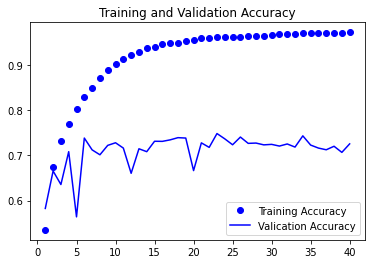

In [0]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

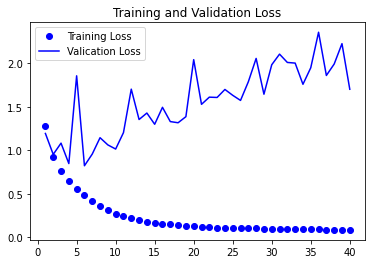

In [0]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [0]:
loss, accuracy = model1.evaluate(test_X, test_labels)

10000/10000 [==============================] - 1s 136us/step


In [0]:
loss

1.7257142793655396

In [0]:
inp = layers.Input(shape=(32,32,3))
layer = layers.Conv2D(128,(3,3),activation='relu',padding='same', input_shape=(32,32,3))(inp)
layer = layers.MaxPooling2D((2,2))(layer)
layer = BatchNormalization()(layer)
layer = layers.Conv2D(64,(3,3),activation='relu', padding='same')(layer)
layer = layers.MaxPooling2D((2,2))(layer)
layer = BatchNormalization()(layer)
layer = layers.Conv2D(64,(3,3),activation='relu', padding='same')(layer)
layer = layers.MaxPooling2D((2,2))(layer)
layer = BatchNormalization()(layer)
residual = layers.Conv2D(64, 1, strides=8)(inp)
layer = layers.add([layer, residual])
layer = layers.Flatten()(layer)
layer = layers.Dense(10, activation='softmax')(layer)
model2 = models.Model(input=inp, outputs=layer)
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 32, 32, 128)  3584        input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_28 (MaxPooling2D) (None, 16, 16, 128)  0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 16, 16, 128)  512         max_pooling2d_28[0][0]           
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  from ipykernel import kernelapp as app


In [0]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_X, train_labels, epochs=40, batch_size=64, validation_data=(val_X, val_labels))

Train on 45500 samples, validate on 4500 samples
Epoch 1/40
45500/45500 [==============================] - 9s 207us/step - loss: 1.2951 - accuracy: 0.5491 - val_loss: 1.1668 - val_accuracy: 0.5953
Epoch 2/40
45500/45500 [==============================] - 8s 187us/step - loss: 0.9045 - accuracy: 0.6836 - val_loss: 1.2755 - val_accuracy: 0.5716
Epoch 3/40
45500/45500 [==============================] - 9s 193us/step - loss: 0.7630 - accuracy: 0.7359 - val_loss: 1.1050 - val_accuracy: 0.6244
Epoch 4/40
45500/45500 [==============================] - 8s 186us/step - loss: 0.6636 - accuracy: 0.7696 - val_loss: 0.8225 - val_accuracy: 0.7180
Epoch 5/40
45500/45500 [==============================] - 9s 190us/step - loss: 0.5946 - accuracy: 0.7951 - val_loss: 0.8681 - val_accuracy: 0.7033
Epoch 6/40
45500/45500 [==============================] - 9s 193us/step - loss: 0.5259 - accuracy: 0.8190 - val_loss: 0.8835 - val_accuracy: 0.7071
Epoch 7/40
45500/45500 [==============================] - 9s 18

In [0]:
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc)+1)

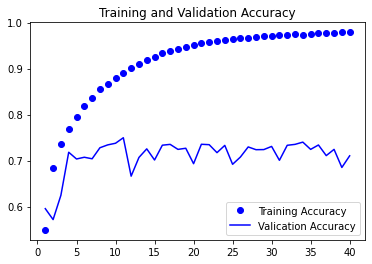

In [0]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

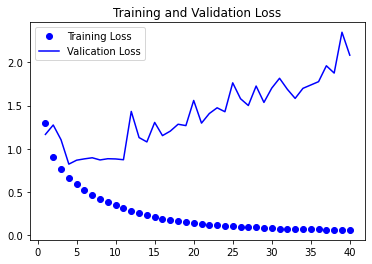

In [0]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [0]:
loss, accuracy = model2.evaluate(test_X, test_labels)

10000/10000 [==============================] - 1s 138us/step


In [0]:
loss

2.085492774391174

In [0]:
accuracy

0.7134000062942505

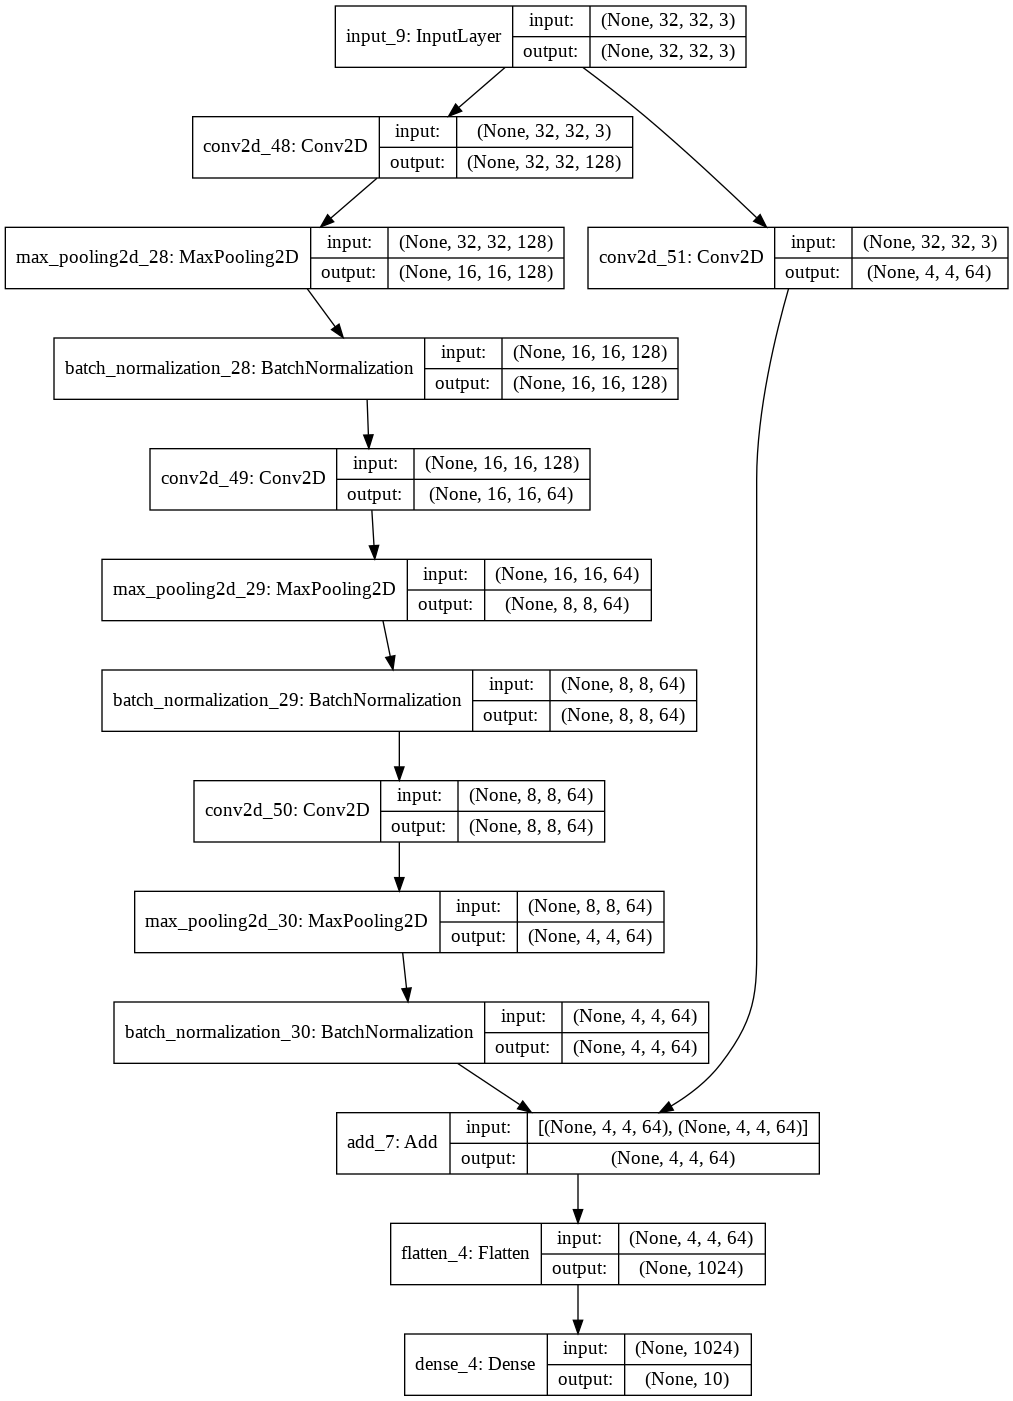

In [0]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True)  

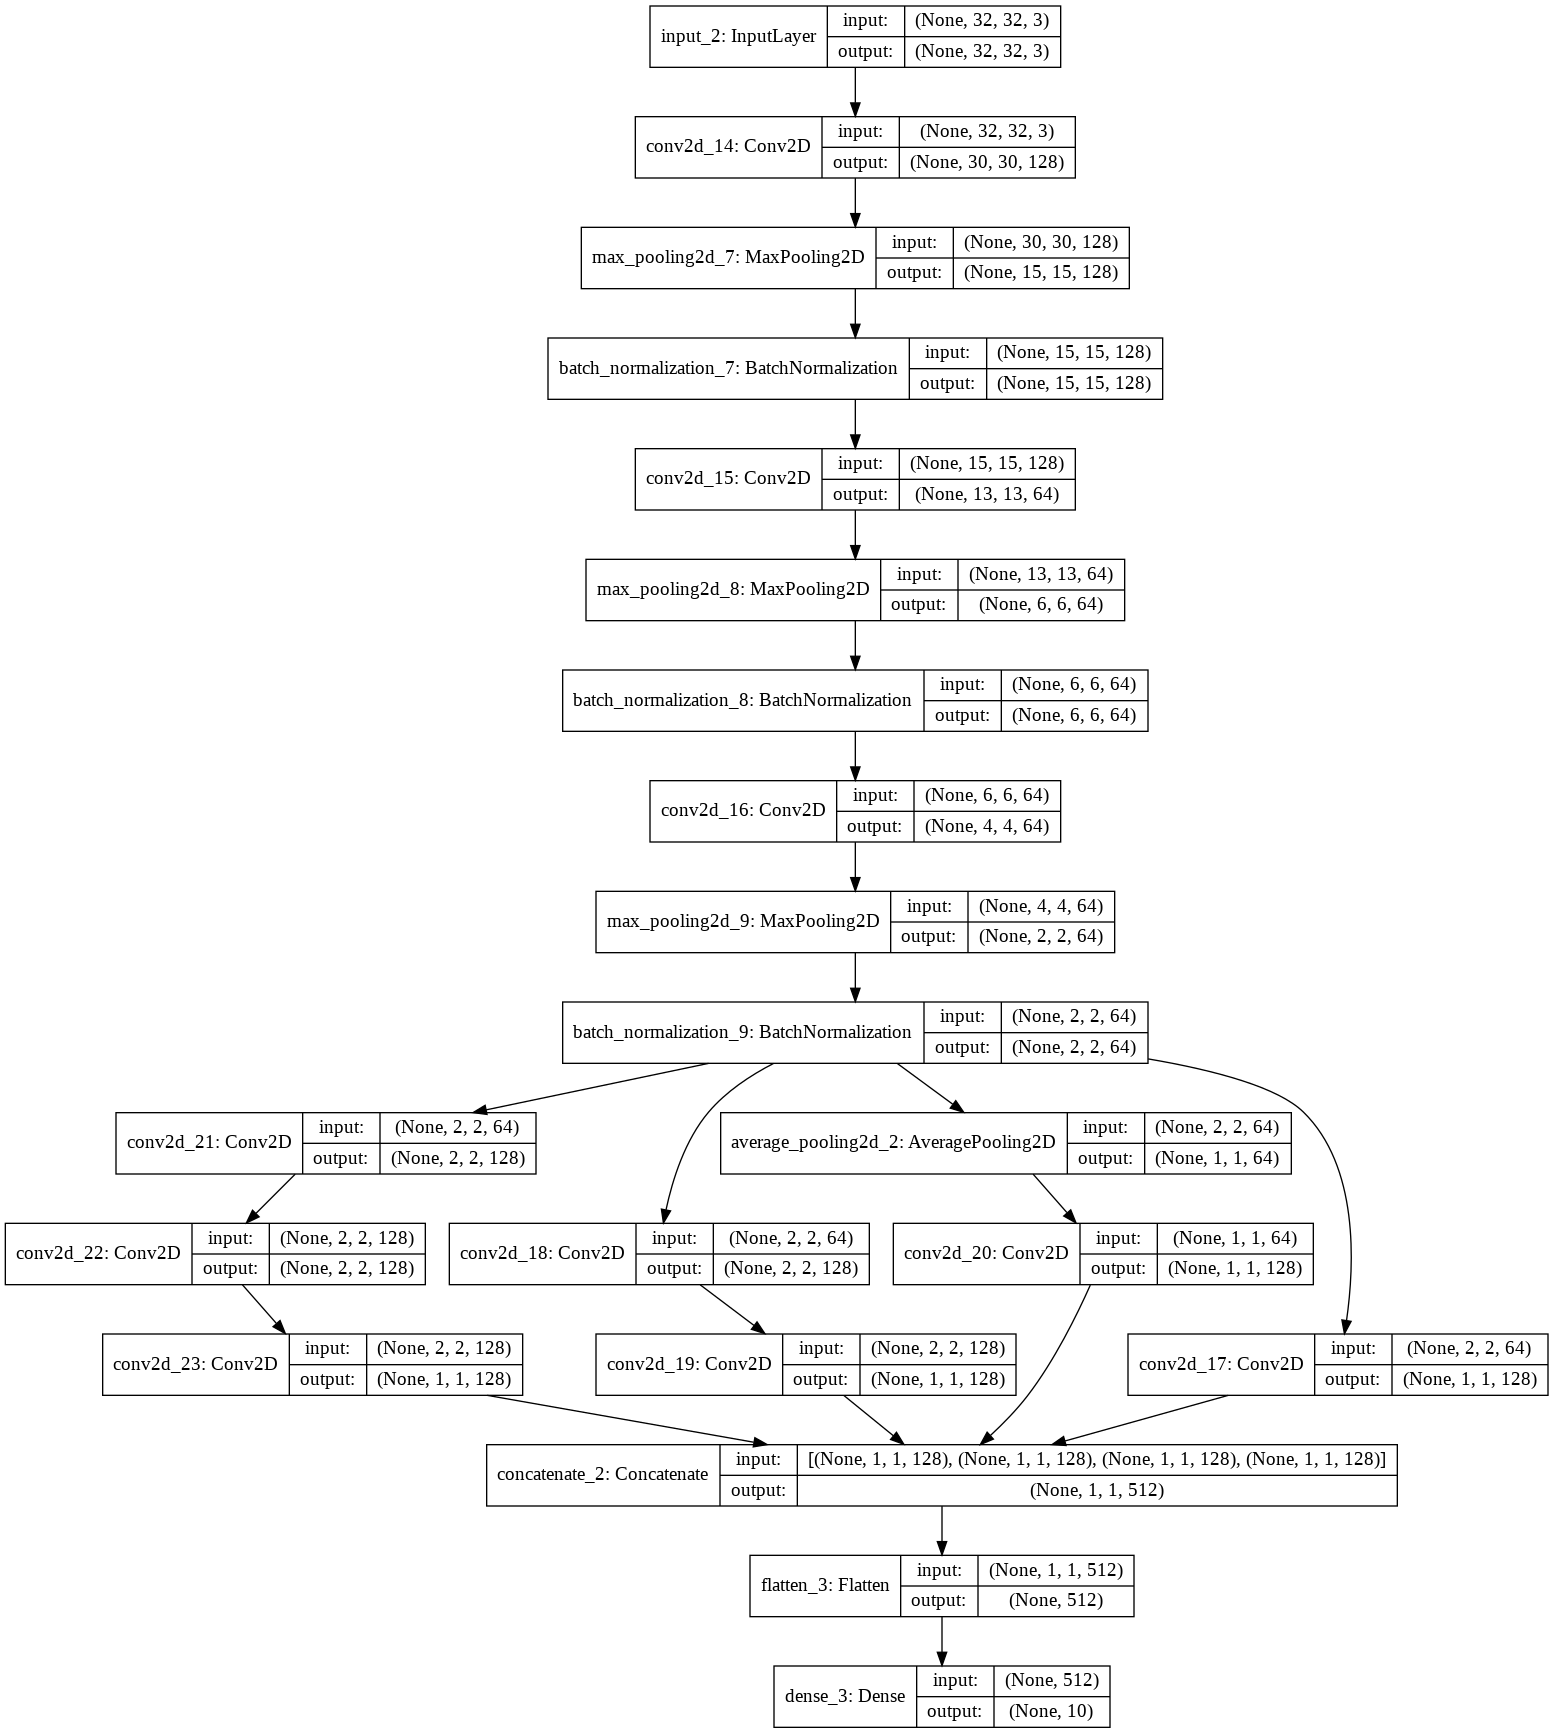

In [0]:
plot_model(model1, show_shapes=True)  

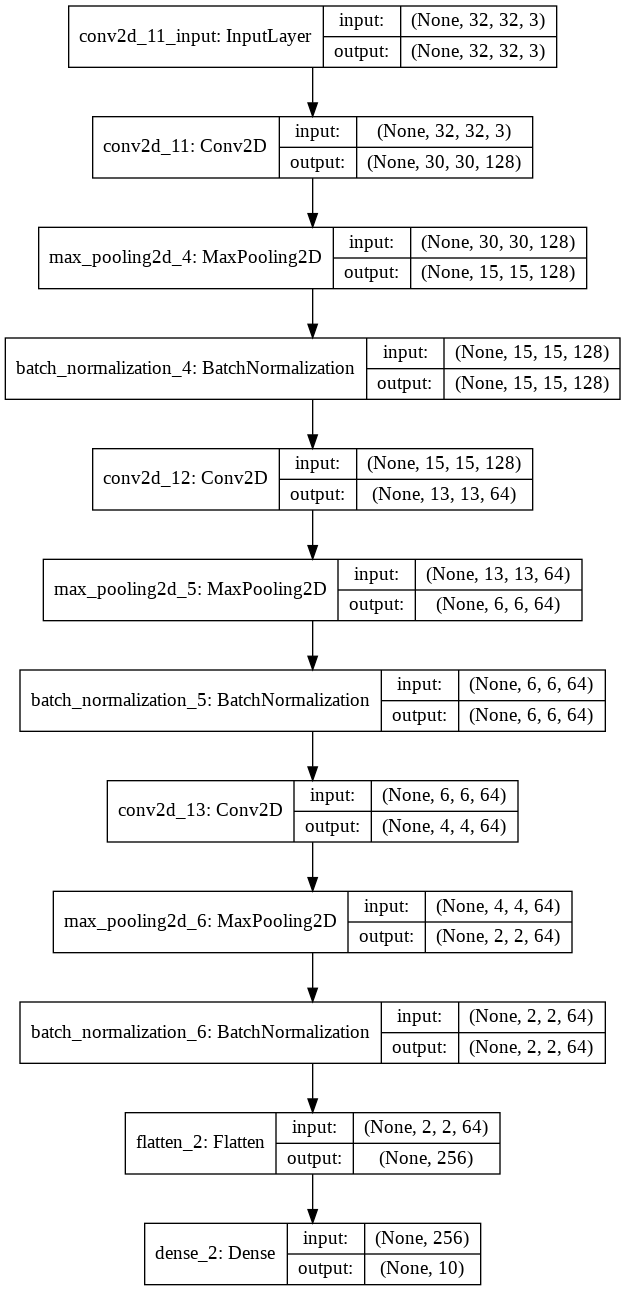

In [0]:
plot_model(model, show_shapes=True)  